In [1]:
import numpy as np, uproot as ur, awkward as ak, pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import pickle
import os
from scipy.optimize import curve_fit

def gaus(x, amp, mean, sigma):
    return amp * np.exp( -(x - mean)**2 / (2*sigma**2) ) 


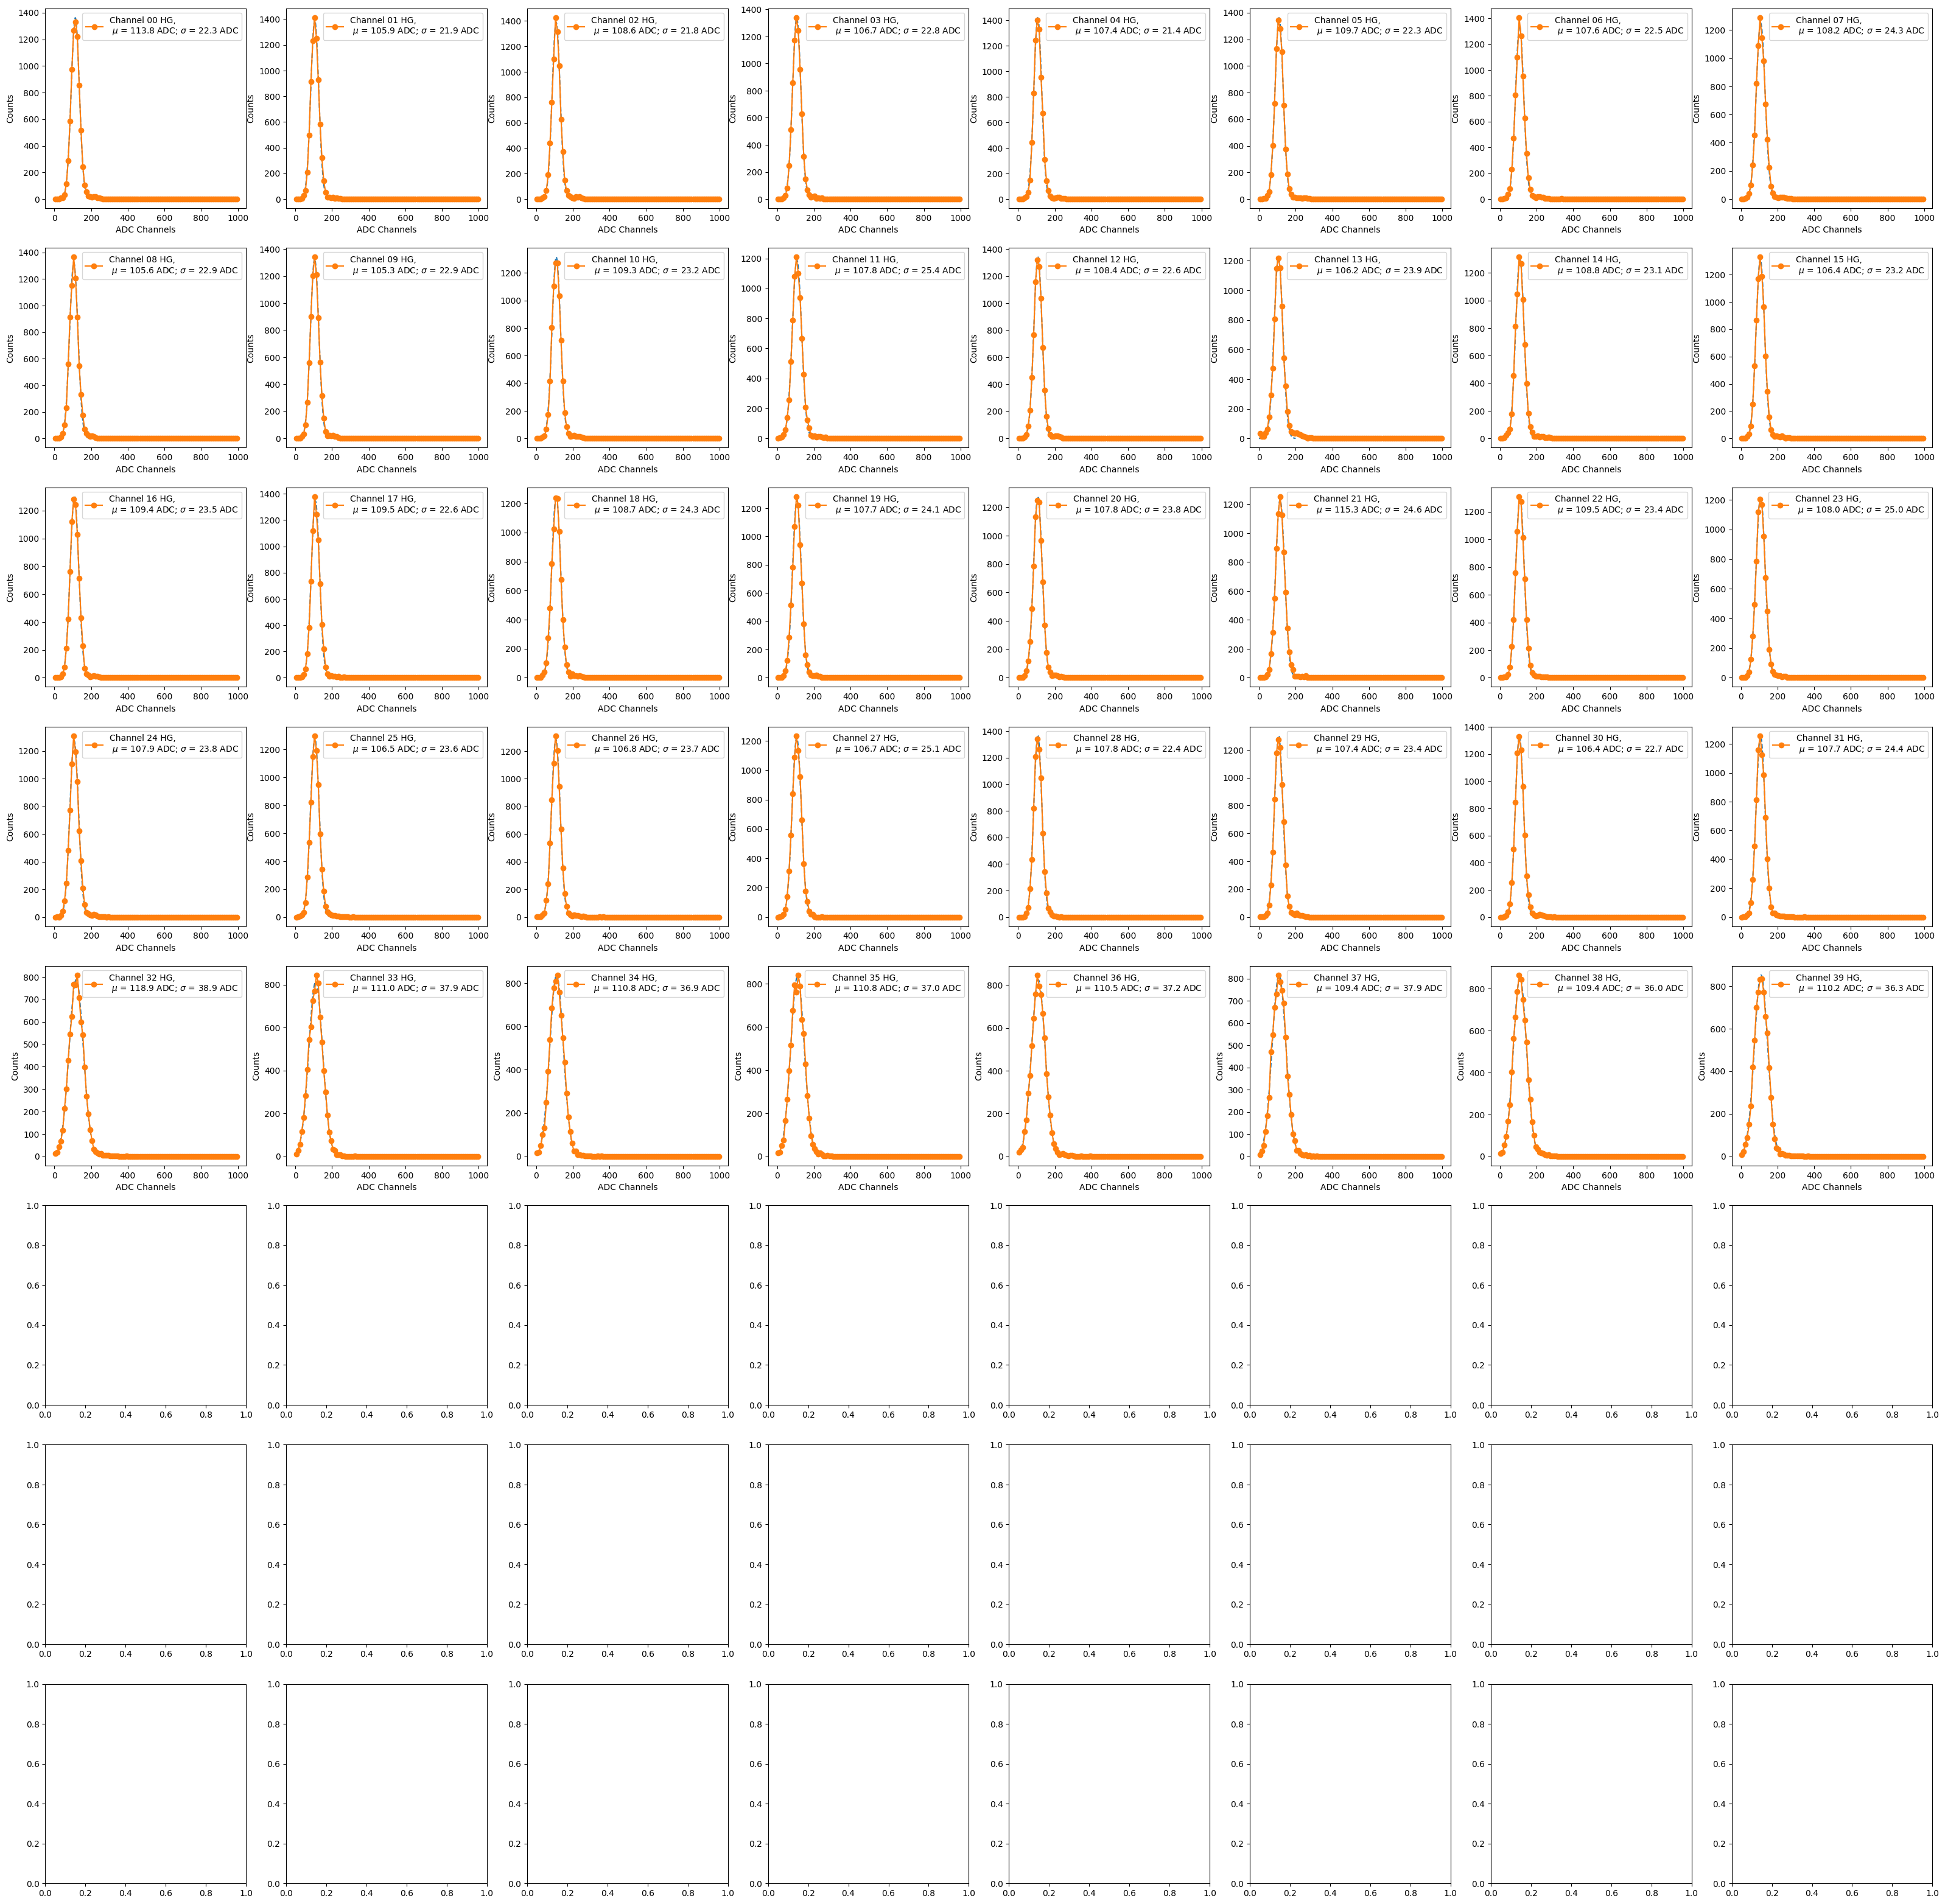

In [2]:
####### Pedestal QA plots for individual channels 
datafile = 'data/square_new/Run0_list.txt' #'data/new_cable/2_trigger_tile/Run11_list.txt'

with open(datafile) as f:
    lines = f.read().split('  0  00')[1:]

df = {}
dg = {}
for i in range(64):
    df[str(f'{i:02}')] = []
    dg[str(f'{i:02}')] = []

keys = list(df.keys())
for i in range(len(lines)):
    event = '  0  00' + lines[i]
    channels = [row.split() for row in event.split('\n')][:40]
    #if len(channels) < 63: continue
    channel = [row[1] for row in channels]
    LG = [row[2] for row in channels]
    HG = [int(row[3]) for row in channels]
    for ch, hg, lg in zip(channel,HG,LG):
        df[ch].append(hg)
        dg[ch].append(lg)

pedestal = []
sigma = []
fig, ax = plt.subplots(8,8,figsize=(40,40),sharex=False,sharey=False)
#plt.subplots_adjust(wspace=0,hspace=0)
cuts = []
for i in range(40):
    plt.sca(ax[i//8,i%8])
    bins, edges = np.histogram(np.array(dg[keys[i]],dtype=int),bins=100,range=(0,1000))
    centers = edges[1:]/2+edges[:-1]/2
    coeff, _ = curve_fit(gaus,centers[1:],bins[1:],p0=(1000,100,100))
    pedestal.append(coeff[1])
    sigma.append(abs(coeff[2]))
    x = np.linspace(0,200,100)
    #plt.plot(x,gaus(x,*coeff),linestyle='dashed',label='')
    #plt.errorbar(centers,bins,fmt='-o',label=rf'Channel {keys[i]} LG,' '\n' rf'$\mu$ = {coeff[1]:.1f} ADC; $\sigma$ = {abs(coeff[2]):.1f} ADC')
    
    bins, edges = np.histogram(np.array(df[keys[i]],dtype=int),bins=100,range=(0,1000))
    centers = edges[1:]/2+edges[:-1]/2
    coeff, _ = curve_fit(gaus,centers[1:],bins[1:],p0=(1000,100,100))
    pedestal.append(coeff[1])
    sigma.append(abs(coeff[2]))
    x = np.linspace(0,200,100)
    plt.plot(x,gaus(x,*coeff),linestyle='dashed')
    plt.errorbar(centers,bins,fmt='-o',label=f'Channel {keys[i]} HG,' '\n' rf' $\mu$ = {coeff[1]:.1f} ADC; $\sigma$ = {abs(coeff[2]):.1f} ADC')

    #plt.yscale('log')
    #plt.gca().set_ylim(bottom=1)
    plt.legend()
    plt.ylabel('Counts')
    plt.xlabel('ADC Channels')
#ax[0, 0].set_ylabel('Counts', fontsize=35, labelpad=20)
#ax[-1, -1].set_xlabel('ADC Channels', fontsize=35, labelpad=20)
#plt.xlim(0,200)
plt.show()

(0.0, 200.0)

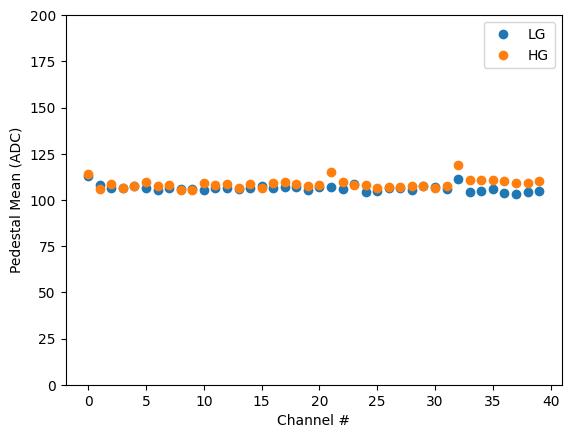

In [3]:
plt.errorbar(np.arange(0,40,1),pedestal[::2],label=f'LG',fmt='o')
plt.errorbar(np.arange(0,40,1),pedestal[1::2],label=f'HG',fmt='o')
plt.xlabel('Channel #')
plt.ylabel('Pedestal Mean (ADC)')
plt.legend()
plt.ylim(bottom=0,top=200)

(0.0, 40.554322275500624)

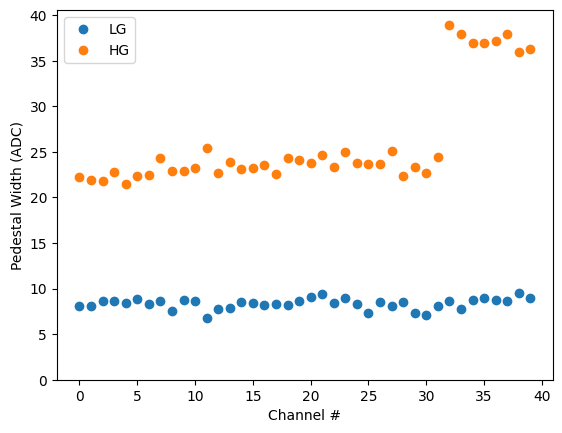

In [4]:
plt.errorbar(np.arange(0,40,1),sigma[::2],label=f'LG',fmt='o')
plt.errorbar(np.arange(0,40,1),sigma[1::2],label=f'HG',fmt='o')
plt.xlabel('Channel #')
plt.ylabel('Pedestal Width (ADC)')
plt.legend()
plt.ylim(bottom=0)

Text(0.5, 0, 'Threshold')

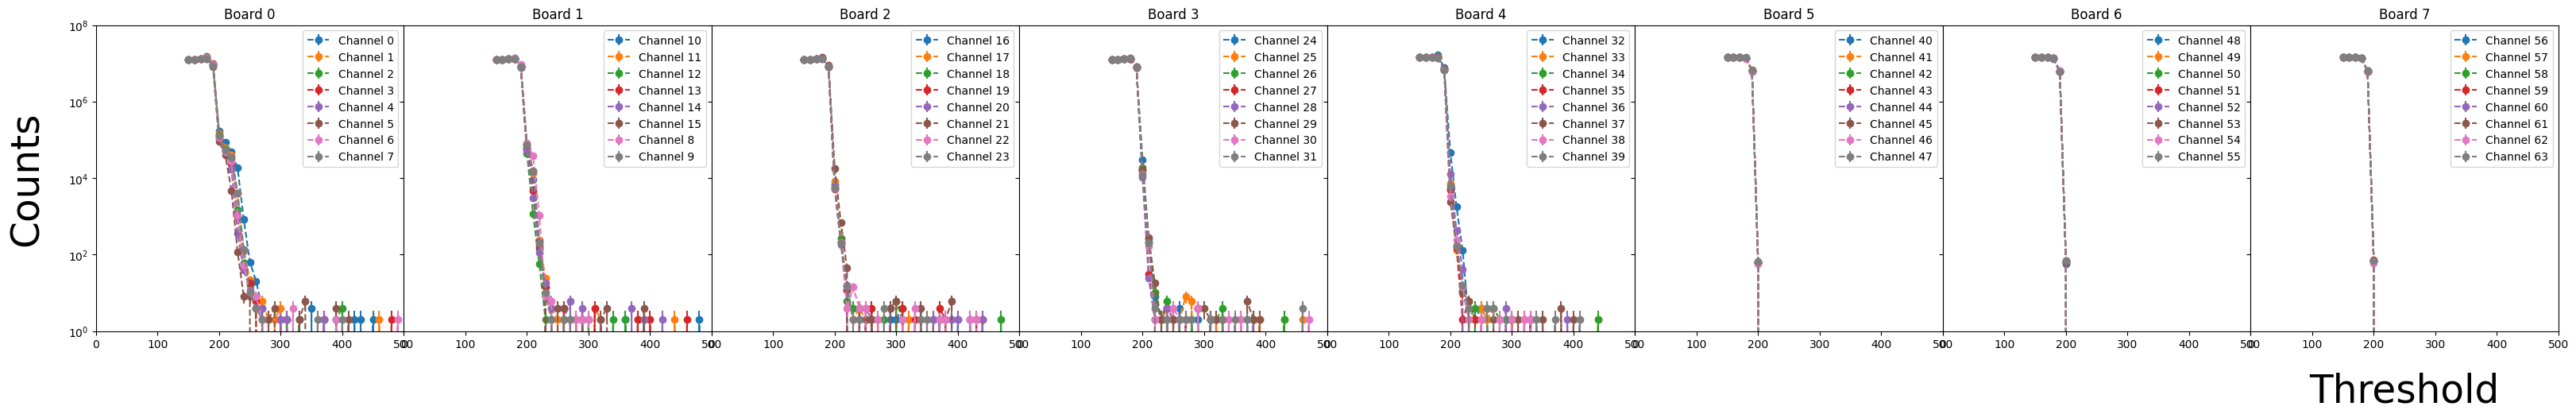

In [5]:
###### QA test for staircase per channel
path = 'data/square_new/'
files = sorted(os.listdir(path))

fig, ax = plt.subplots(1,8,figsize=(40,5),sharex=True,sharey=True)
plt.subplots_adjust(wspace=0,hspace=0)
for file in files:
    if 'Staircase' not in file: continue
    if 'Run1' not in file: continue
    channel = int(file.split('_')[-1].split('.txt')[0])
    plt.sca(ax[channel//8])
    with open(path+file) as f:
        lines = f.read().split()
    threshold = np.array(lines[::2],dtype=float)
    counts = np.array(lines[1::2],dtype=float)
    plt.errorbar(threshold,counts,yerr=np.sqrt(counts),fmt='--o',label=f'Channel {channel}')
    plt.yscale('log')
    plt.gca().set_ylim(bottom=1,top=1E8)
    plt.legend()
    plt.title(f'Board {channel//8}')
    plt.xlim(0,500)
ax[0].set_ylabel('Counts', fontsize=35, labelpad=20)
ax[-1].set_xlabel('Threshold', fontsize=35, labelpad=20)

In [6]:
####### Pedestal QA plots for individual channels 
datafile = 'data/square_new/Run2_list.txt' #'data/new_cable/Run19_list.txt'

with open(datafile) as f:
    lines = f.read().split('  0  00')[1:]

df = {}
dg = {}
for i in range(64):
    df[str(f'{i:02}')] = []
    dg[str(f'{i:02}')] = []
time = []
keys = list(df.keys())
for i in range(len(lines)):
    event = '  0  00' + lines[i]
    channels = [row.split() for row in event.split('\n')][:40]
    if len(channels) < 40: continue
    channel = [row[1] for row in channels]
    LG = [row[2] for row in channels]
    HG = [int(row[3]) for row in channels]
    time.append(float(channels[0][4]))
    for ch, hg, lg in zip(channel,HG,LG):
        df[ch].append(hg)
        dg[ch].append(lg)

In [7]:
external = np.array([[  80.,  240.,  400.,  560.,  720.,  880., 1040., 1200., 1360.,
        1520., 1680., 1840., 2000., 2160., 2320., 2480., 2640., 2800.,
        2960., 3120., 3280., 3440., 3600., 3760., 3920., 4080., 4240.,
        4400., 4560., 4720., 4880., 5040., 5200., 5360., 5520., 5680.,
        5840., 6000., 6160., 6320., 6480., 6640., 6800., 6960., 7120.,
        7280., 7440., 7600., 7760., 7920.],
 [ 33,   3,  34,  75, 122, 130, 112, 101,  67,  39,  28,  24,  16,
         17,  17,   6,  14,   7,   5,   4,   2,   1,   0,   1,   4,   0,
          3,   3,   0,   0,   2,   1,   0,   0,   2,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1]])

/tmp/ipykernel_2432686/3136254158.py:19: RuntimeWarning: divide by zero encountered in divide
  coeff, _ = curve_fit(gaus,centers[35:],bins[35:],p0=(400,1500,100),sigma=1/bins[35:])


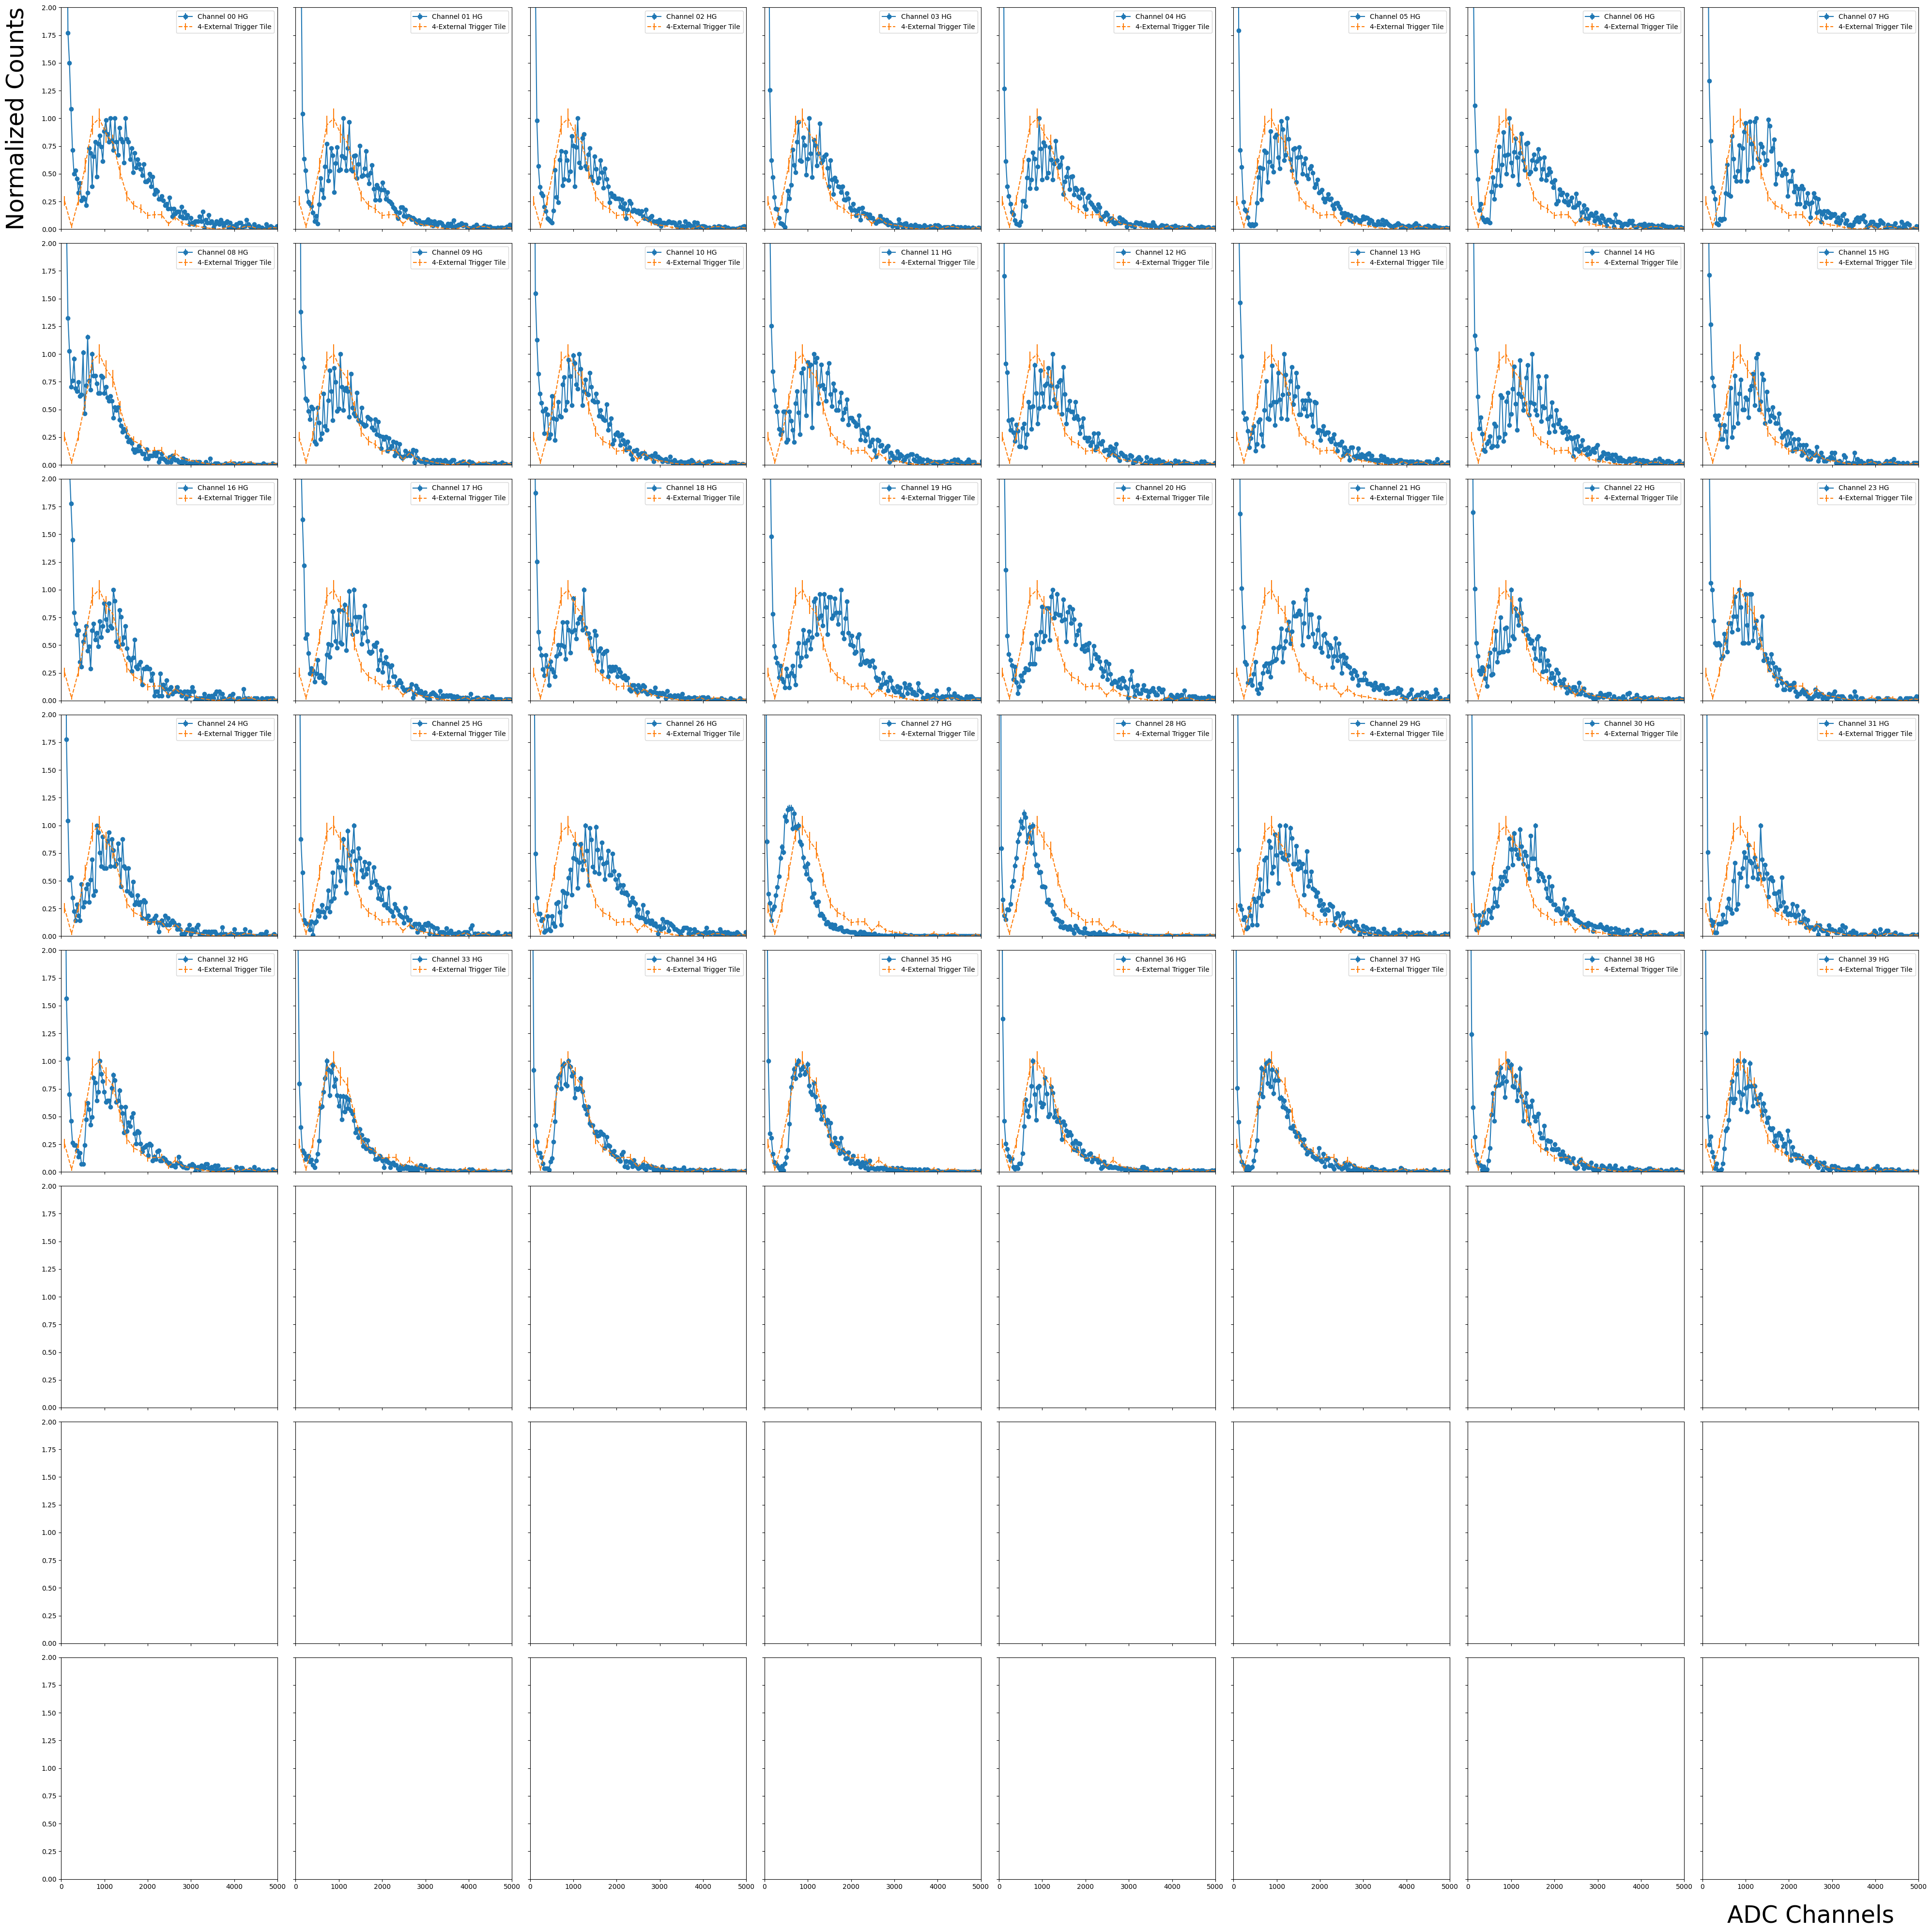

In [8]:
fig, ax = plt.subplots(8,8,figsize=(40,40),sharex=True,sharey=True)
#plt.subplots_adjust(wspace=0.20,hspace=0)
rate = []
data_hg = []
data_e = []
for i in range(40):
    plt.sca(ax[i//8][i%8])
    #bins, edges = np.histogram(np.array(dg[keys[i]],dtype=int)-pedestal[i*2]-3*sigma[i*2],bins=250,range=(0,8000))
    #centers = edges[1:]/2+edges[:-1]/2
    #plt.errorbar(centers,bins,fmt='-o',label=f'Channel {keys[i]} LG')
    bins, edges = np.histogram(np.array(df[keys[i]],dtype=int)-pedestal[i*2+1]-3*sigma[i*2+1],bins=200,range=(0,7000),density=True)
    centers = edges[1:]/2+edges[:-1]/2
    
    #if keys[i] == '05': external =  [centers,bins]
    plt.errorbar(centers,bins/max(bins[20:]),yerr=np.sqrt(bins),fmt='-o',label=f'Channel {keys[i]} HG')
    plt.errorbar(external[0],external[1]/max(external[1]),yerr=np.sqrt(external[1])/max(external[1]),fmt='--',label=f'4-External Trigger Tile')
    plt.ylim(0,2)
    try:
        coeff, _ = curve_fit(gaus,centers[35:],bins[35:],p0=(400,1500,100),sigma=1/bins[35:])
    except: pass
    x = np.linspace(0,2000,100)
    #plt.errorbar(x,gaus(x,*coeff)/max(bins[30:]),fmt='--',c='r')
    hg = np.array(df[keys[i]],dtype=int)-pedestal[i*2+1]-3*sigma[i*2+1]
    data_hg.append(coeff[1])
    data_e.append(abs(coeff[2]))
    rate.append(len(hg[hg>500]))
    #plt.yscale('log')
    #plt.gca().set_ylim(bottom=1)
    plt.xlim(0,5000)
    plt.legend()
    #plt.ylabel('Normalized Counts')
    #plt.xlabel('ADC Channels')
    #plt.axvline(500,c='r')
    
    
    #plt.yscale('log')
#plt.suptitle('Run 13: Threshold = 280')
ax[0, 0].set_ylabel('Normalized Counts', fontsize=35, labelpad=20)
ax[-1, -1].set_xlabel('ADC Channels', fontsize=35, labelpad=20)
#plt.xlim(0,200)
plt.tight_layout()
plt.savefig('output/mip.png')
plt.show()

In [9]:
data_hg = []
for i in range(40):
    data_hg.append(np.array(df[keys[i]],dtype=int)-pedestal[i*2+1]-3*sigma[i*2+1])

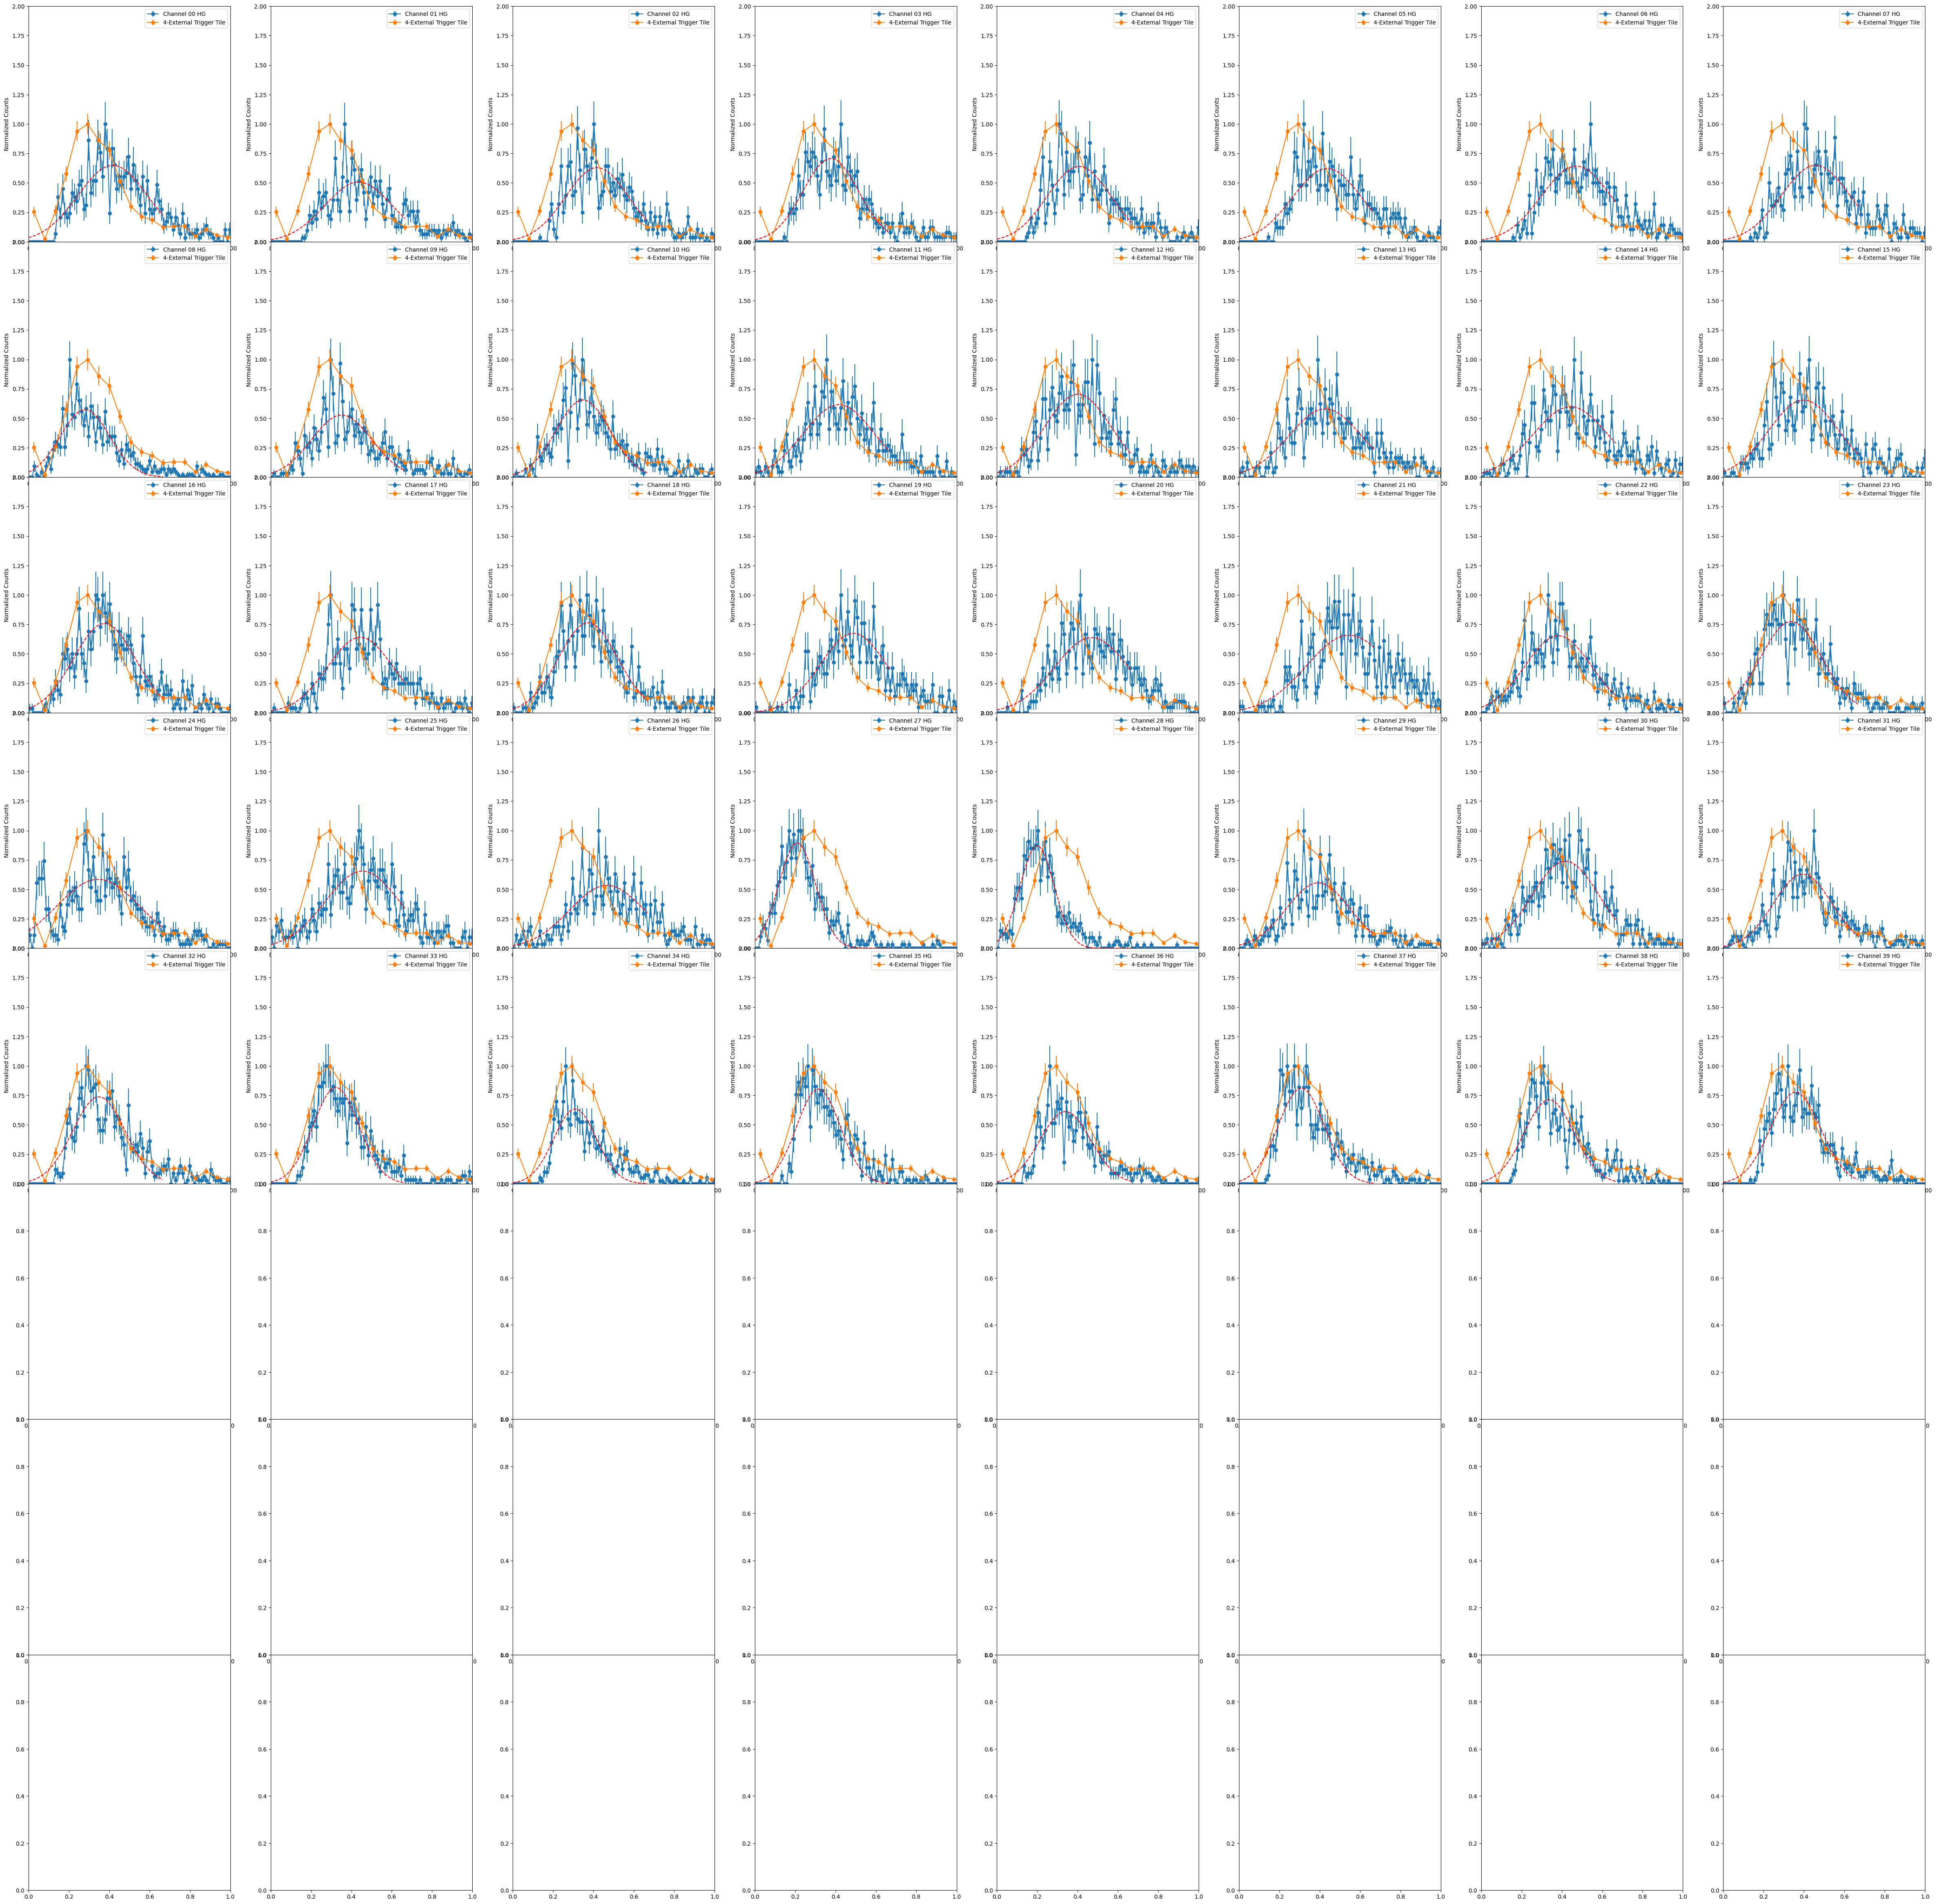

In [13]:
fig, ax = plt.subplots(8,8,figsize=(60,60),sharex=False,sharey=False)
plt.subplots_adjust(wspace=0.2,hspace=0)
channel_num = []
MIP = []
MIP_e = []
for i in range(40):
    plt.sca(ax[i//8][i%8])
    cut = (data_hg[i % 8]>400) & (data_hg[i % 8+32]>400)

    bins, edges = np.histogram(data_hg[i][cut],bins=200,range=(0,7000))
    centers = edges[1:]/2+edges[:-1]/2

    plt.errorbar(centers,bins/max(bins[3:]),yerr=np.sqrt(bins)/max(bins[3:]),fmt='-o',label=f'Channel {keys[i]} HG')
    plt.errorbar(external[0],external[1]/max(external[1]),yerr=np.sqrt(external[1])/max(external[1]),fmt='-o',label=f'4-External Trigger Tile')
    try:
        coeff, covar = curve_fit(gaus,centers,bins,p0=(400,1500,100))
        x = np.linspace(0,2000,100)
        plt.errorbar(x,gaus(x,*coeff)/max(bins),fmt='--',c='r')
        channel_num.append(i)
        MIP.append(coeff[1])
        MIP_e.append(covar[1][1])
    except: pass
    plt.ylim(0,2)
    plt.legend()
    plt.ylabel('Normalized Counts')
    plt.xlabel('ADC Channels')
    #plt.axvline(500,c='r')
    plt.xlim(0,3000)

plt.savefig('output/cut_mip.png',format='png'
)
plt.show()

(0.0, 2475.460112348069)

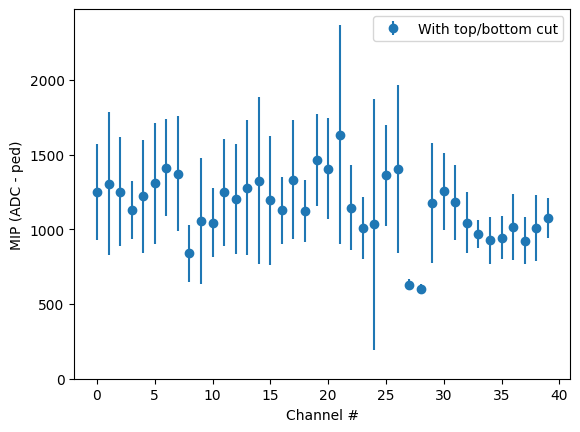

In [14]:
plt.errorbar(channel_num,MIP,yerr=MIP_e,label=f'With top/bottom cut',fmt='o')
plt.xlabel('Channel #')
plt.ylabel('MIP (ADC - ped)')
plt.legend()
plt.ylim(bottom=0)